In [1]:
!pip install boto3

In [2]:
import os
import boto3
from botocore.handlers import disable_signing
import re 
import numpy as np
client = boto3.client('s3')
client.meta.events.register('choose-signer.s3.*', disable_signing)

PIOP1 cohort is in prefix ds002785

preprocessed data are in /derivatives folder

let's get all the task working memory fmri files for   individual sub-001

we can use paginator to research 'task-workingmemory' in the files
 
and a list generator to retrive the "Key" filed on the selected objects 

In [3]:
paginator = client.get_paginator('list_objects')
operation_parameters = {'Bucket': 'openneuro.org', 
                        'Prefix': 'ds002785/derivatives/fmriprep/sub-0001/func/'}
result = paginator.paginate(**operation_parameters)
filtered_iterator = result.search("Contents[?Key.contains(@,'task-workingmemory')]")
task_list=[key_data['Key'] for key_data in filtered_iterator]

Now make a panda dataframe and split the file names 

We can use panda dataframes, split() functions  

and display it within a panda dataframe 

In [4]:
import pandas as pd
files=np.array(task_list)
filename_split = [x.split("/") for x in  files.tolist()]
pd_filename_list=  pd.DataFrame( filename_split)[5]
pd.DataFrame([y.split("_") for y in  pd_filename_list ])

,0,1,2,3,4,5
0,sub-0001,task-workingmemory,acq-seq,desc-confounds,regressors.json,None
1,sub-0001,task-workingmemory,acq-seq,desc-confounds,regressors.tsv,None
2,sub-0001,task-workingmemory,acq-seq,space-MNI152NLin2009cAsym,boldref.nii.gz,None
3,sub-0001,task-workingmemory,acq-seq,space-MNI152NLin2009cAsym,desc-aparcaseg,dseg.nii.gz
4,sub-0001,task-workingmemory,acq-seq,space-MNI152NLin2009cAsym,desc-aseg,dseg.nii.gz
5,sub-0001,task-workingmemory,acq-seq,space-MNI152NLin2009cAsym,desc-brain,mask.json
6,sub-0001,task-workingmemory,acq-seq,space-MNI152NLin2009cAsym,desc-brain,mask.nii.gz
7,sub-0001,task-workingmemory,acq-seq,space-MNI152NLin2009cAsym,desc-preproc,bold.json
8,sub-0001,task-workingmemory,acq-seq,space-MNI152NLin2009cAsym,desc-preproc,bold.nii.gz
9,sub-0001,task-workingmemory,acq-seq,space-T1w,boldref.nii.gz,None


now list all the nii.gz files

we  can use 'endwith' function 

In [5]:
nii_task=np.array([x.endswith('nii.gz') for x in task_list]) 
nii_files=np.asarray(task_list)[nii_task]
pd.DataFrame([y.split("_") for y in pd.DataFrame([x.split("/") for x in  nii_files])[5] ])

,0,1,2,3,4,5
0,sub-0001,task-workingmemory,acq-seq,space-MNI152NLin2009cAsym,boldref.nii.gz,None
1,sub-0001,task-workingmemory,acq-seq,space-MNI152NLin2009cAsym,desc-aparcaseg,dseg.nii.gz
2,sub-0001,task-workingmemory,acq-seq,space-MNI152NLin2009cAsym,desc-aseg,dseg.nii.gz
3,sub-0001,task-workingmemory,acq-seq,space-MNI152NLin2009cAsym,desc-brain,mask.nii.gz
4,sub-0001,task-workingmemory,acq-seq,space-MNI152NLin2009cAsym,desc-preproc,bold.nii.gz
5,sub-0001,task-workingmemory,acq-seq,space-T1w,boldref.nii.gz,None
6,sub-0001,task-workingmemory,acq-seq,space-T1w,desc-aparcaseg,dseg.nii.gz
7,sub-0001,task-workingmemory,acq-seq,space-T1w,desc-aseg,dseg.nii.gz
8,sub-0001,task-workingmemory,acq-seq,space-T1w,desc-brain,mask.nii.gz
9,sub-0001,task-workingmemory,acq-seq,space-T1w,desc-preproc,bold.nii.gz


select the key for preprocessed workingmemory frmi volumes in MNI space

In [6]:
file_key = nii_files[4]  # choose the file you want in nii_list    

In [9]:
import os.path
if not  os.path.exists( "task-workingmemory.nii.gz"): # if the image "taskstop.nii.gz" is not there yet
     client.download_file('openneuro.org', file_key,"task-workingmemory.nii.gz" ) 
#download it to "taskstop.nii.gz"

In [10]:
paginator = client.get_paginator('list_objects')
operation_parameters = {'Bucket': 'openneuro.org', 
                        'Prefix': 'ds002785/sub-0001/func/sub-0001_task-workingmemory'} 
                        #we have all the task files here
result = paginator.paginate(**operation_parameters)
filtered_iterator = result.search("Contents[?Key.contains(@,'events.tsv')]")
# we want the file that contains "events"


In [11]:
event_list=[a['Key'] for a in filtered_iterator] # we make the file list by getting 'Key'field 
print (event_list)

['ds002785/sub-0001/func/sub-0001_task-workingmemory_acq-seq_events.tsv']


In [12]:
 # there should be only one file
import os.path
if not  os.path.exists( "task-workingmemory.events.tsv"): #if teh .tsv file does not existe yet   
    client.download_file('openneuro.org', event_list[0] ,"task-workingmemory.events.tsv") # download it

In [23]:
pd_events=pd.read_csv("task-workingmemory.events.tsv", sep="\t")
pd_events

,onset,duration,trial_type,response_accuracy,response_time,response_hand
0,8.0,6.0,active_change,miss,NaN,NaN
1,20.0,6.0,active_change,miss,NaN,NaN
2,26.0,6.0,active_nochange,incorrect,0.8861,right
3,36.0,6.0,passive,miss,NaN,NaN
4,42.0,6.0,active_change,correct,0.6736,right
5,52.0,6.0,active_nochange,incorrect,0.9963,right
6,60.0,6.0,active_change,correct,0.7541,right
7,66.0,6.0,active_nochange,incorrect,0.2499,right
8,72.0,6.0,active_change,correct,0.8407,right
9,78.0,6.0,active_change,correct,0.4905,right


In [14]:
! pip install nilearn

In [15]:
from nilearn import plotting
from nilearn import image as nli

In [16]:
img= nli.load_img('task-workingmemory.nii.gz') # read  image "taskstop.nii.gz" with nilear image library 

print(img.get_data().shape) #verify dimensions of teh data

(65, 77, 60, 200)


/home/karkar/miniconda3/envs/fmri/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until


/home/karkar/miniconda3/envs/fmri/lib/python3.7/site-packages/nilearn/plotting/html_stat_map.py:217: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  bg_img = load_mni152_template()


(65, 77, 60)



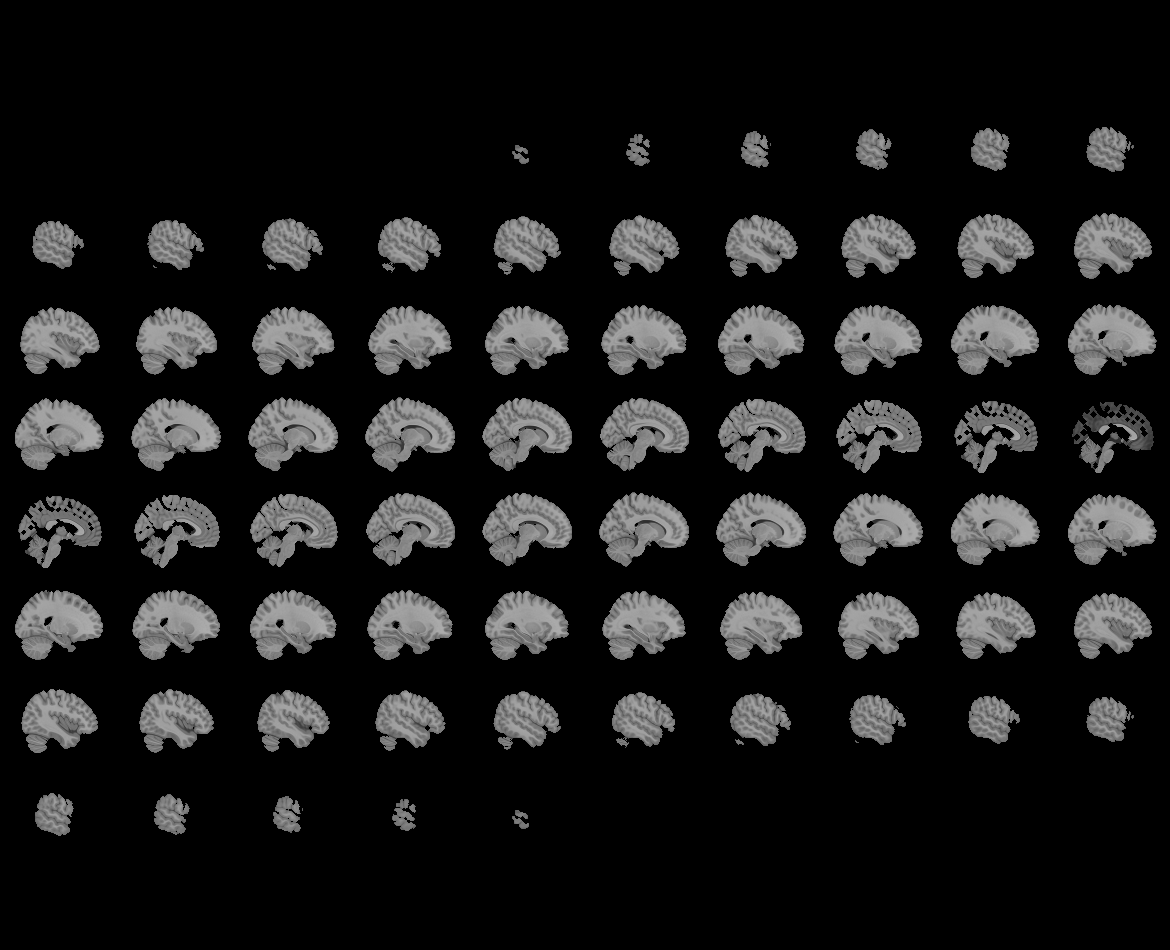
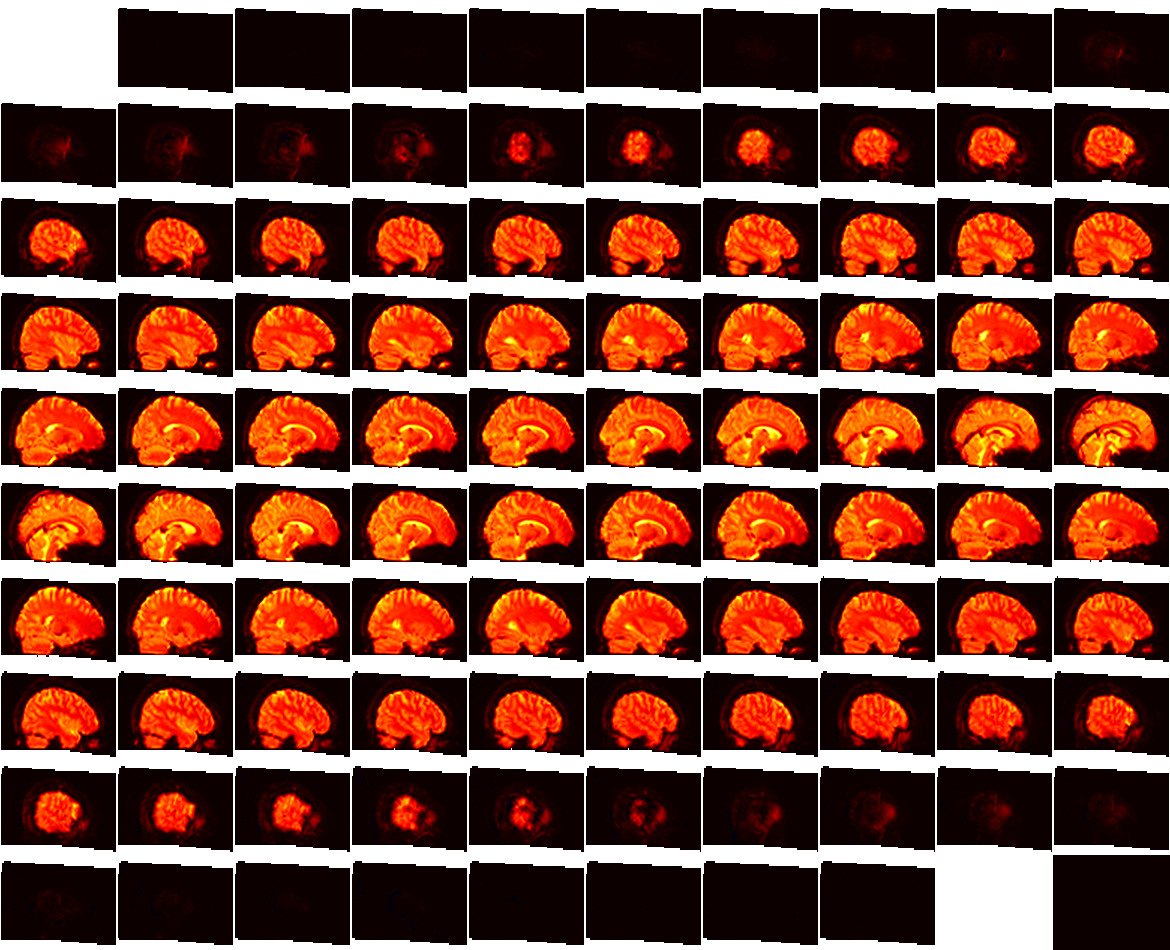

In [17]:
import numpy as np
mean_img= nli.mean_img(img)
print(mean_img.shape) # compute average image using image library
plotting.view_img(mean_img)  # riplanar interactive view of average image

In [18]:
from matplotlib import pyplot as plt

import numpy as np


(65, 77, 60, 200)
(64, 76)


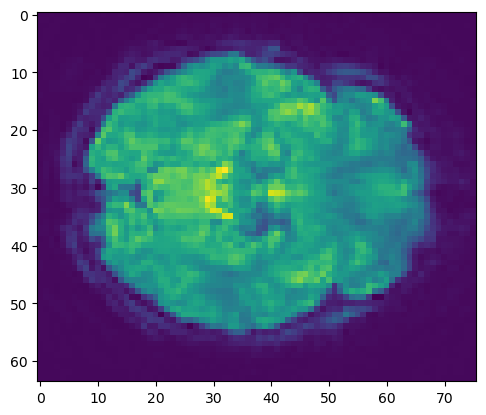

In [19]:
volume= img.get_fdata() # extract 4D array from nilear image object 
print (volume.shape)
flat_slice=volume[1:,1:,20,0] #extract one slice (2D image)
 # use matplotlib imshow to plot the slice  
print (flat_slice.shape)

plt.imshow(flat_slice)


In [20]:
#créer un mask
#img_2= NiftiMapsMasker(img, mask_img=YOURMASK)

In [21]:
ts=volume[32,42,20,0:] # extract the time serie for one voxel 
dt=2 #  RT : time in sec between 2 image in [s] --> 6s ??
#ran=np.linspace(0,len(ts)-1,len(ts))
time_vec= np.array(range(0,len(ts)*dt,dt)) # vector of slice times in [s]  
print(time_vec)

[  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106
 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142
 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178
 180 182 184 186 188 190 192 194 196 198 200 202 204 206 208 210 212 214
 216 218 220 222 224 226 228 230 232 234 236 238 240 242 244 246 248 250
 252 254 256 258 260 262 264 266 268 270 272 274 276 278 280 282 284 286
 288 290 292 294 296 298 300 302 304 306 308 310 312 314 316 318 320 322
 324 326 328 330 332 334 336 338 340 342 344 346 348 350 352 354 356 358
 360 362 364 366 368 370 372 374 376 378 380 382 384 386 388 390 392 394
 396 398]


No handles with labels found to put in legend.


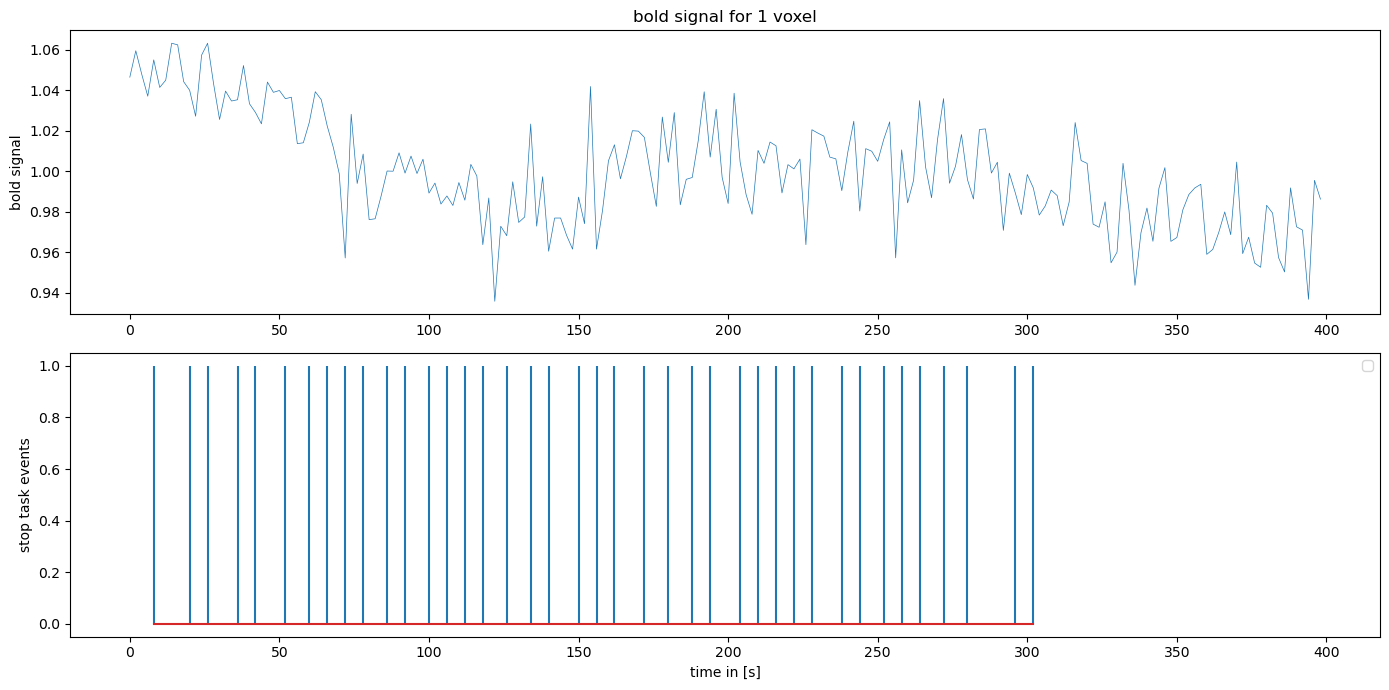

In [22]:
plt.figure(figsize=(14,7))
ax1=plt.subplot(211)
plt.plot(time_vec, ts/ts.mean(), label='bold signal at'+np.array2string(np.array([30,35,30])), linewidth=0.5)
plt.ylabel('bold signal')
plt.title('bold signal for 1 voxel')

plt.subplot(212,  sharex = ax1)
plt.stem(pd_events['onset'],np.ones(pd_events.shape[0]),  markerfmt='None') 
# Add title and labels
plt.ylabel('stop task events')
plt.xlabel('time in [s]')


# Add legend

plt.legend()

# Auto space

plt.tight_layout()

# Display plot

plt.show() 

In [25]:
from scipy.fft import fft,fftfreq
from scipy.fftpack import fftshift
from scipy.signal import spectrogram

In [30]:
# removing complex signal drift 
# a / fit a 4 degree polynome 
# find a0, a, b, c, d that fit the signal y= a0 + ax + bx² +cx³ +dx⁴
# you can use use the code use in the filtering exercice 
# withoptimize.curve_fit and a test_func 
# or use numpy.polyfit
.....
drift = ....

# b/ remove the fitted drift from the signal
yf=ts-drift

No handles with labels found to put in legend.
No handles with labels found to put in legend.


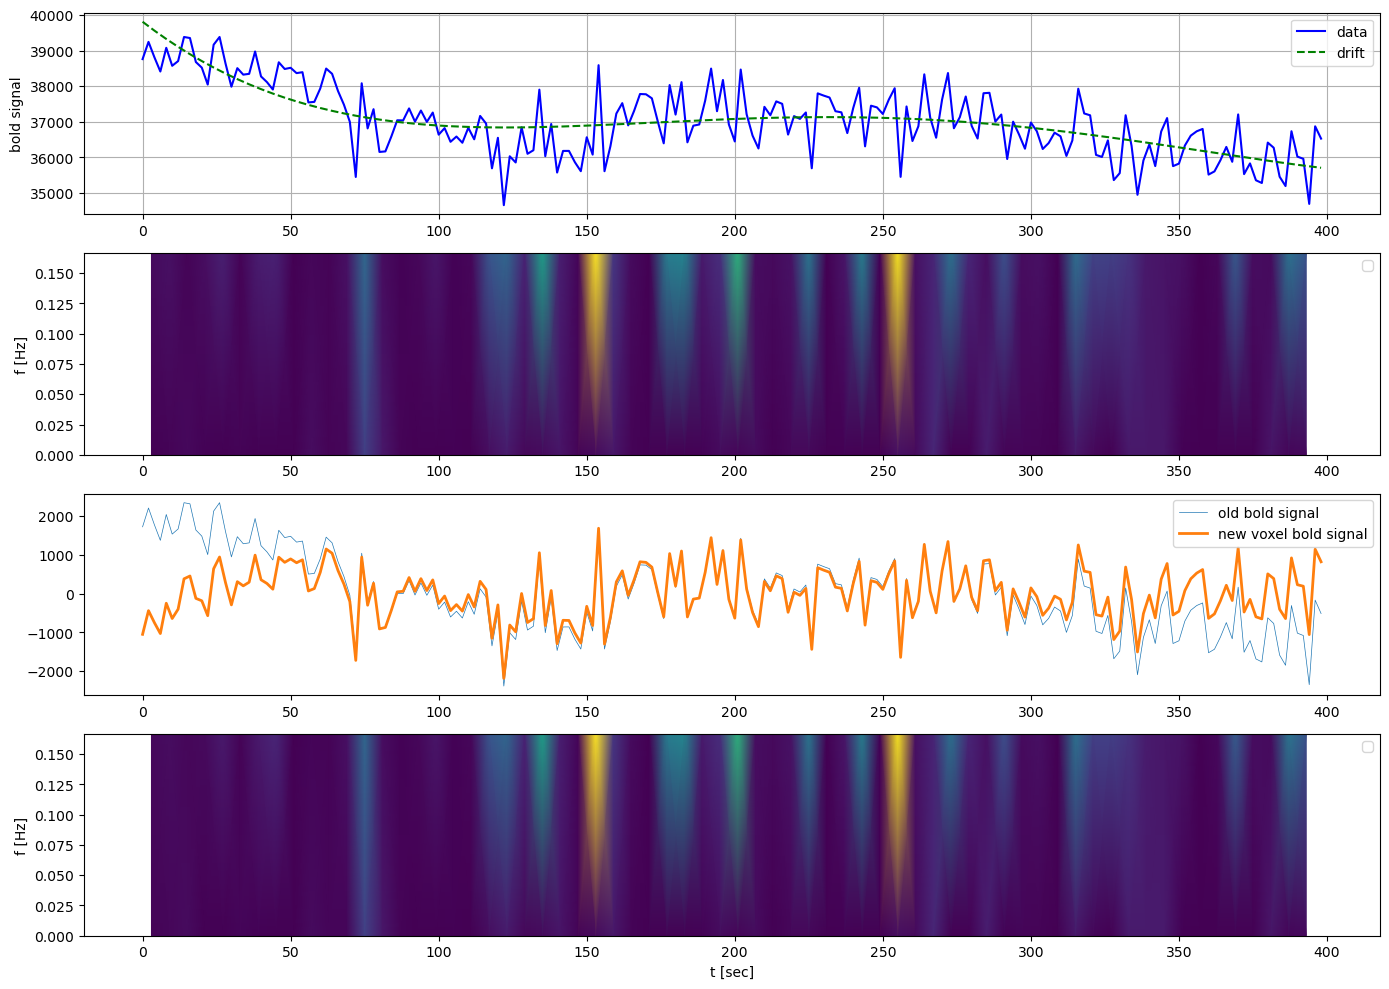

In [35]:
#plotting the whole process
t = time_vec
y=ts
plt.figure(figsize=(14,10))

# plot signal and the fitted drift
ax2=plt.subplot(411)
plt.plot(t, y, 'b-', label='signal')
plt.plot(t,drift, 'g--', label='drift')
plt.ylabel('bold signal')
plt.legend()
plt.grid()

# plot  sprectrogram for original signal 
freqs, times, spectro = spectrogram( y,fs=1/dt, nperseg=3)
plt.subplot(412, sharex=ax2)
plt.pcolormesh(times, fftshift(freqs), fftshift(spectro, axes=0), shading='gouraud')
plt.ylabel('f [Hz]')
plt.legend()

# plot old and new signal (centerd on the mean)
plt.subplot(413, sharex=ax2)
plt.plot(np.array(range(0,len(ts)))*dt, y-y.mean(), label='old bold signal', linewidth=0.5)
plt.plot(np.array(range(0,len(ts)))*dt, yf-yf.mean(), label='new voxel bold signal', linewidth=2)
plt.legend()

# plot  sprectrogram for new signal 
freqs, times, spectro = spectrogram( yf,fs=1/dt, nperseg=3)
plt.subplot(414, sharex=ax2)
plt.pcolormesh(times, fftshift(freqs), fftshift(spectro, axes=0), shading='gouraud')
plt.ylabel('f [Hz]')
plt.xlabel('t [sec]')
plt.legend()

# Auto space
plt.tight_layout()

# Display plot
plt.show()

In [ ]:

# Make a high pass filter with the code use in the filtering exercice 
fc = 0.01  # desired cutoff frequency of the filter, Hz
....
# Plot the frequency response ( the code use in the filtering exercice)
...
# apply the filter to the signal obtained after drift removal (the code use in the filtering exercice)
...
# plot both the original and filtered signals (the code use in the filtering exercice)
...
# calculate the FFT of the filtered signal and plot the frequency components (the code use in the filtering exercice)
...
# plot spectrogram (the code use in the previous cell )  before and after filtering

In [ ]:
# Make a low pass filter  with the code use in the filtering exercice
fc = 0.15 
# Plot the frequency response ( the code use in the filtering exercice)
...
# apply the filter to the signal obtained after drift removal (the code use in the filtering exercice)
...
# plot both the original and filtered signals (the code use in the filtering exercice)
...
# calculate the FFT of the filtered signal and plot the frequency components (the code use in the filtering exercice)
...
# plot spectrogram (the code use in the previous cell )  before and after filtering